# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

621


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# empty arrays to be appended
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# start of the print
print("Beginning Data Retrieval")
print("-----------------------------")

# start counter
count = 0

for citi in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={citi}&units={units}"
    
    # Get weather data
    weather_json = requests.get(query_url).json()
    
    # increase count
    count += 1

    try:
        #print city name
        name = weather_json["name"]
        print(f"Processing Record {count} of {len(cities)}: {name}")
        
        #append arrays
        city.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        
    except:
        print("City not found. Skipping...")
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipp

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
--------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# to convert timestamp to regular date
from datetime import datetime

converted_date = []

for dt in date:
    converted_date.append(datetime.fromtimestamp(dt))
    

# read csv file
df = pd.DataFrame({
    "City": city,
    "Country": country,
    "Date": converted_date,
    "Latitude": lat,
    "Longitude": lng,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Max Temperature": max_temp,
    "Wind Speed": wind_speed
})

# save data frame as csv
df.to_csv("../output_data/cities.csv", encoding='utf-8', index=False)

# view number of items per column
df.count()

City               0
Country            0
Date               0
Latitude           0
Longitude          0
Cloudiness         0
Humidity           0
Max Temperature    0
Wind Speed         0
dtype: int64

In [5]:
# print data frame
df

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

IndexError: list index out of range

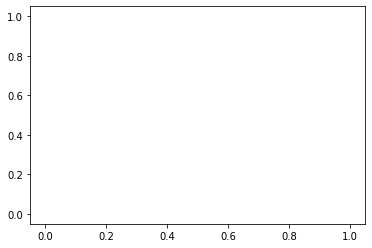

In [6]:
# create scatter plot
plt.scatter(df["Latitude"], df["Max Temperature"])

# add labels and title
plt.title(f"City Latitude vs. Max Temperature {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/1LatvTemp.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the max temperature (F) \
in each city based on its latitude. Based on the results, it seems the closer \
you get to the equator the hotter it gets, and the further away, the colder it gets.")

#### Latitude vs. Humidity Plot

In [ ]:
# create scatter plot
plt.scatter(df["Latitude"], df["Humidity"])

# add labels and title
plt.title(f"City Latitude vs. Humidity {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/2LatvHumid.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the humidity (%) \
in each city based on its latitude. Based on the results, it does not seem \
that latitude affects humidity since the data points are all over the place.")

#### Latitude vs. Cloudiness Plot

In [ ]:
# create scatter plot
plt.scatter(df["Latitude"], df["Cloudiness"])

# add labels and title
plt.title(f"City Latitude vs. Cloudiness {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/3LatvCloud.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the cloudiness (%) \
in each city based on its latitude. Based on the results, it does not seem \
that latitude affects cloudiness since the data points are all over the place.")

#### Latitude vs. Wind Speed Plot

In [ ]:
# create scatter plot
plt.scatter(df["Latitude"], df["Wind Speed"])

# add labels and title
plt.title(f"City Latitude vs. Wind Speed {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/4LatvWind.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the wind speed (mph) \
in each city based on its latitude. Based on the results, it does not seem \
that latitude affects wind speed since the data points are all over the place.")

## Linear Regression

In [ ]:
# x axis for noth and souht
nx_values = []
sx_values = []

# y axis for temp
ny_values = []
sy_values = []

# y axis for humidity
nhy_values = []
shy_values = []

# y axis for cloudiness
ncy_values = []
scy_values = []

# y axis for wind speed
nwy_values = []
swy_values = []

# create index
indexes = range(0, len(df["City"]))

# append arrays
for index in indexes:
    if df["Latitude"][index] >= 0:
        nx_values.append(df["Latitude"][index])
        ny_values.append(df["Max Temperature"][index])
        nhy_values.append(df["Humidity"][index])
        ncy_values.append(df["Cloudiness"][index])
        nwy_values.append(df["Wind Speed"][index])
    if df["Latitude"][index] < 0:
        sx_values.append(df["Latitude"][index])
        sy_values.append(df["Max Temperature"][index])
        shy_values.append(df["Humidity"][index])
        scy_values.append(df["Cloudiness"][index])
        swy_values.append(df["Wind Speed"][index])
        
# convert all array values from float to integer
nx_values = np.array(nx_values, dtype = "int")
sx_values = np.array(sx_values, dtype = "int")
ny_values = np.array(ny_values, dtype = "int")
sy_values = np.array(sy_values, dtype = "int")
nhy_values = np.array(nhy_values, dtype = "int")
shy_values = np.array(shy_values, dtype = "int")
ncy_values = np.array(ncy_values, dtype = "int")
scy_values = np.array(scy_values, dtype = "int")
nwy_values = np.array(nwy_values, dtype = "int")
swy_values = np.array(swy_values, dtype = "int")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, ny_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, ny_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/5NLatvTemp.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the max temperature (F) \
in each northern city based on its latitude. Based on the results, it seems the closer \
you get to the equator the hotter it gets, and the further away, the colder it gets.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, sy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, sy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/6SLatvTemp.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the max temperature (F) \
in each southern city based on its latitude. Based on the results, it seems the closer \
you get to the equator the hotter it gets, and the further away, the colder it gets.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nhy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, nhy_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/7NLatvHumid.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the humidity (%) \
in each northern city based on its latitude. Based on the results, it does not seem \
that latitude affects humidity since the data points are all over the place.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, shy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, shy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/8SLatvHumid.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the humidity (%) \
in each southern city based on its latitude. Based on the results, it does not seem \
that latitude affects humidity since the data points are all over the place.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, ncy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, ncy_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(45,55),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/9NLatvCloud.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the cloudiness (%) \
in each northern city based on its latitude. Based on the results, it does not seem \
that latitude affects cloudiness since the data points are all over the place.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, scy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, scy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/10SLatvCloud.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the cloudiness (%) \
in each southern city based on its latitude. Based on the results, it does not seem \
that latitude affects cloudiness since the data points are all over the place.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nwy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, nwy_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/11NLatvWind.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the wind speed (mph) \
in each northern city based on its latitude. Based on the results, it does not seem \
that latitude affects wind speed since the data points are all over the place.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, swy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, swy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/12sLatvWind.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the wind speed (mph) \
in each southern city based on its latitude. Based on the results, it does not seem \
that latitude affects wind speed since the data points are all over the place.")